In [11]:
import pandas as pd
import numpy as np


In [12]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
X.columns = ['Age', 'Income', 'Score']
X['Gender'] = df['Gender'] == 'Male'
X.astype(float)

,Age,Income,Score,Gender
0,19.0,15.0,39.0,1.0
1,21.0,15.0,81.0,1.0
2,20.0,16.0,6.0,0.0
3,23.0,16.0,77.0,0.0
4,31.0,17.0,40.0,0.0
...,...,...,...,...
195,35.0,120.0,79.0,0.0
196,45.0,126.0,28.0,0.0
197,32.0,126.0,74.0,1.0
198,32.0,137.0,18.0,1.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit_transform(X)
norm=pd.DataFrame(norm,columns=X.columns)
norm

,Age,Income,Score,Gender
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


# TASK 1 & TASK 2

no. of cluster: 2 ,distortion: 37.27227241211875 ,silhouette avg: 0.5194624832665107
no. of cluster: 3 ,distortion: 29.552857611943857 ,silhouette avg: 0.4583525581125425
no. of cluster: 4 ,distortion: 22.390960011928552 ,silhouette avg: 0.3641657522339062
no. of cluster: 5 ,distortion: 19.062840919692906 ,silhouette avg: 0.37089464698896935
no. of cluster: 6 ,distortion: 16.434552548082582 ,silhouette avg: 0.37737920515583256
no. of cluster: 7 ,distortion: 14.441656784744264 ,silhouette avg: 0.3877824994170378
no. of cluster: 8 ,distortion: 12.247907726470768 ,silhouette avg: 0.3925813061313263
no. of cluster: 9 ,distortion: 10.594700818433763 ,silhouette avg: 0.4180442355091744
no. of cluster: 10 ,distortion: 9.392393333765714 ,silhouette avg: 0.43372896366076175


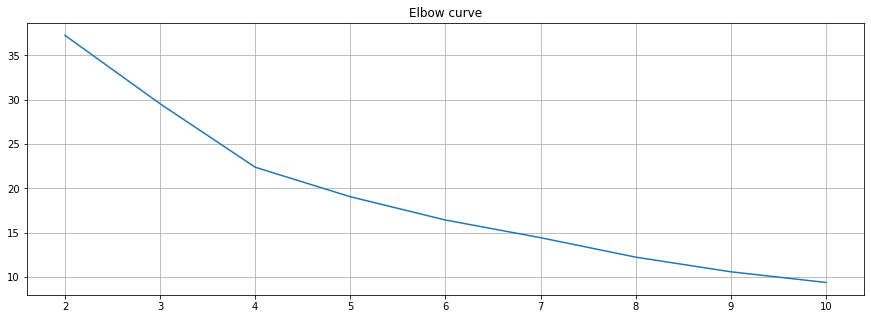

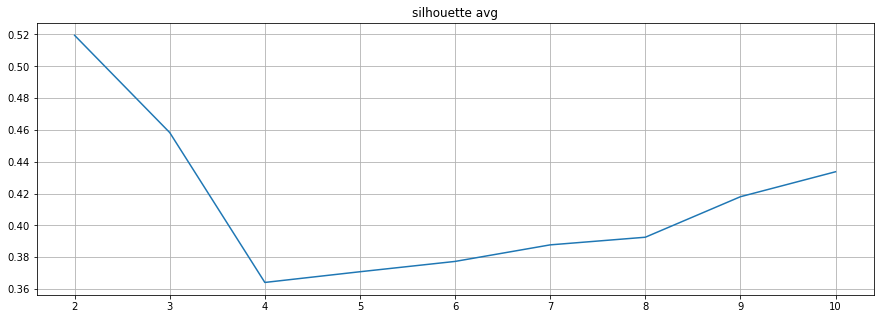

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
data=[]
dist=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=2)
    cluster=kmeans.fit(norm)
    distorion=kmeans.inertia_
    cluster_label=cluster.predict(norm)
    silhouette_avg = silhouette_score(norm, cluster_label)
    dist.append(distorion)
    data.append(silhouette_avg)
    print('no. of cluster:',k,',distortion:',distorion,',silhouette avg:',silhouette_avg)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 11), dist)
plt.grid(True)
plt.title('Elbow curve')
plt.show()
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 11), data)
plt.grid(True)
plt.title('silhouette avg')
plt.show()

In [16]:
temp=pd.DataFrame([data,range(2,11)])
value=temp.T
value.columns=['score','k']
value['k']=value['k'].astype(int)
score=value.sort_values(by='score').iloc[-2,1]
value

,score,k
0,0.519462,2
1,0.458353,3
2,0.364166,4
3,0.370895,5
4,0.377379,6
5,0.387782,7
6,0.392581,8
7,0.418044,9
8,0.433729,10


# K Mean

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


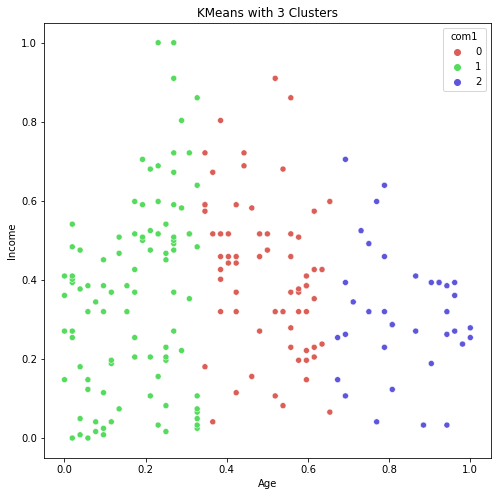

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


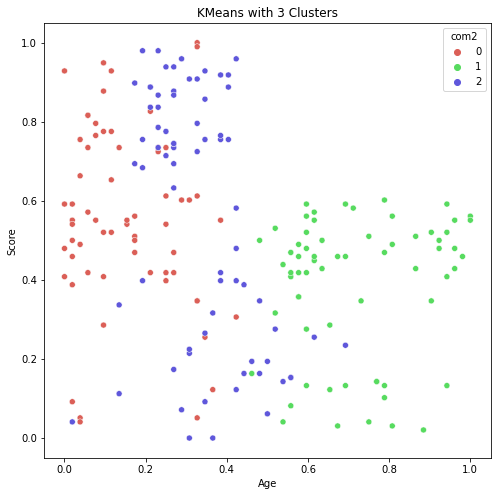

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


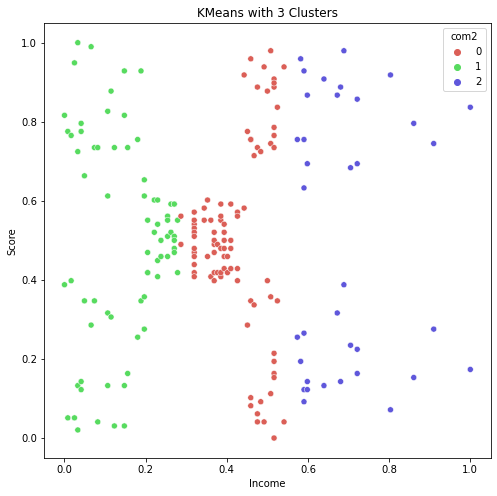

In [17]:
import seaborn as sns

for x in range(2):
    for y in range(x+1,3):
        km5 = KMeans(n_clusters=score).fit(norm.iloc[:,x:y])
        norm[f'com{y}'] = km5.labels_
        plt.figure(figsize=(8, 8))
        sns.scatterplot(norm.iloc[:,x], norm.iloc[:,y], hue=norm[f'com{y}'], palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
        plt.title(f'KMeans with {score} Clusters')
        plt.show()

Kmean :                                                                                                      
    Adv - 1. Simple to use.                                                                                          
          2. Fast                                                                                            
          3. It has proper segrigation.                                                                               
          4. It work well with huge dataset.                                                                          
    Disadv - 1. It can not detect outlier.                                                                             
             2. Every time we have choose k.                                                                          

# DBSCAN

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


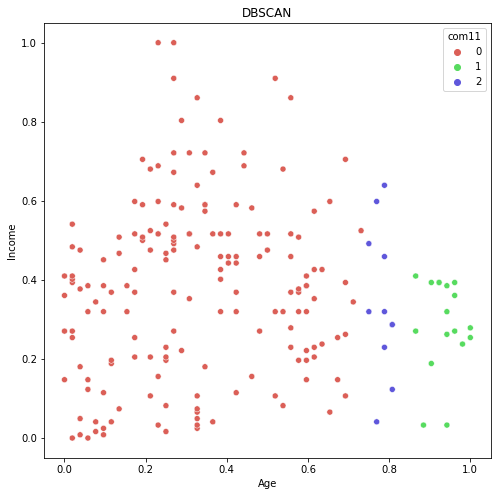

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


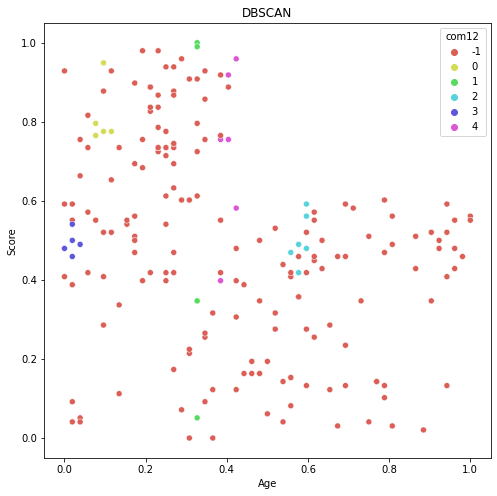

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


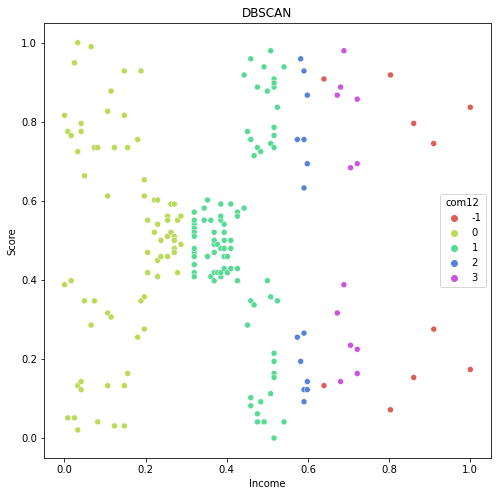

In [18]:
from sklearn.cluster import DBSCAN 
for x in range(2):
    for y in range(x+1,3):
        db1 = DBSCAN(eps=0.03).fit(norm.iloc[:,x:y])
        norm[f'com1{y}'] = db1.labels_
        plt.figure(figsize=(8, 8))
        sns.scatterplot(norm.iloc[:,x], norm.iloc[:,y], hue=norm[f'com1{y}'], palette=sns.color_palette('hls', np.unique(db1.labels_).shape[0]))
        plt.title('DBSCAN')
        plt.show()

DBSCAN :                                                                                                           
    Adv - 1. It can detect outlier                                                                                    
          2. Does not to specify k                                                                              
          3. Work well with large datset.                                                                   
          4. It can have different densities.                                                         
                                                                  
    Disadv - 1. It is sensitive to epsilon and minpoint.                                             
             2. Cluster have large difference in desnity.                                                

# Agglomerative clustering

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


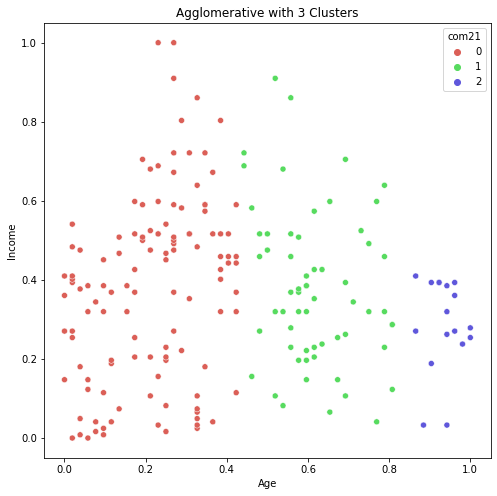

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


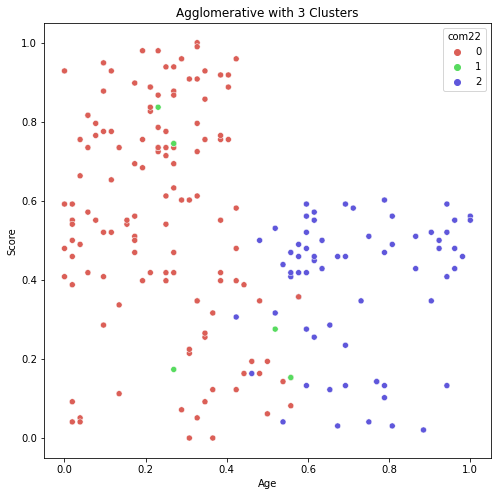

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


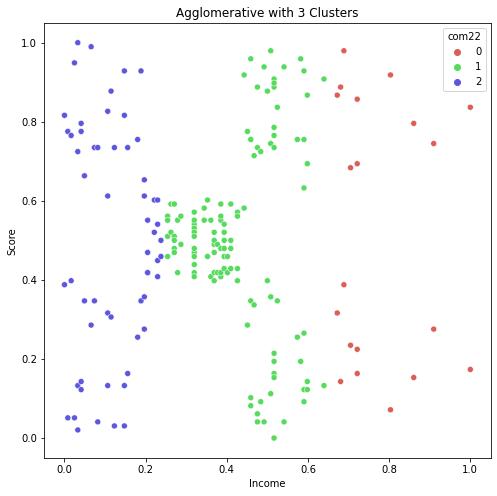

In [26]:
from sklearn.cluster import AgglomerativeClustering 
for x in range(2):
    for y in range(x+1,3):
        agglom = AgglomerativeClustering(n_clusters=score, linkage='average').fit(norm.iloc[:,x:y])
        norm[f'com2{y}'] = agglom.labels_
        plt.figure(figsize=(8, 8))
        sns.scatterplot(norm.iloc[:,x], norm.iloc[:,y], hue=norm[f'com2{y}'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
        plt.title(f'Agglomerative with {score} Clusters')
        plt.show()

Agglomerative :                                                                                                     
    Adv - 1. It work well with uneven cluster size.                                                     
          2. It has different cluster.                                                                 
          3. Ward linkage - give better result.                                                             
    Disadv - 1. No of cluster must be defined.                                                               
             2. Not suitabe for large dataset.                                                                 
             3. If pt. are incorrectly cluster at lower point than the further step lead to incorrect result.        
             4. Average linkage - not giving better result.                                                   

# HDBSCAN

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


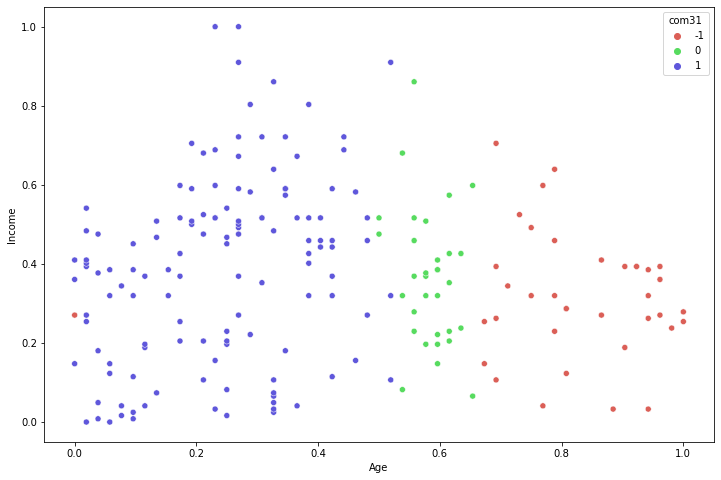

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


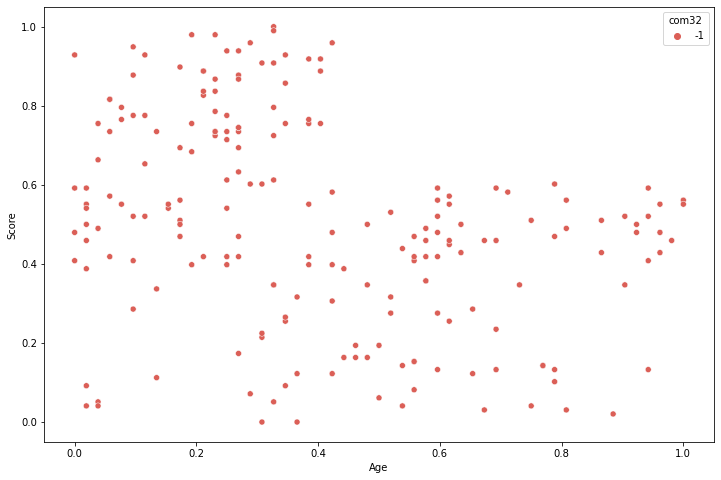

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


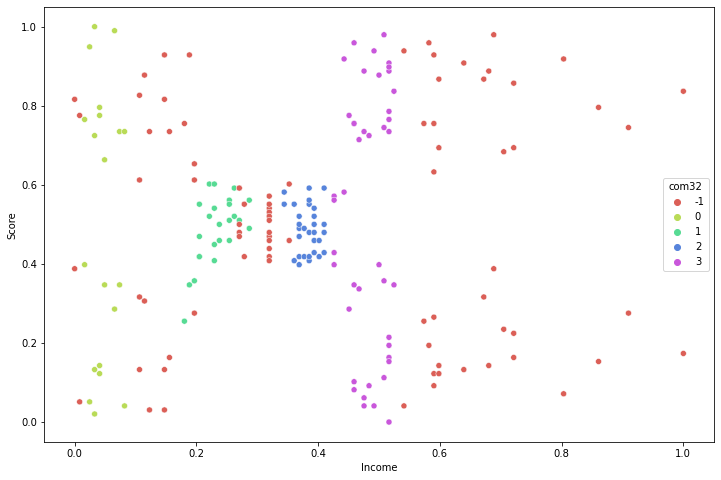

In [28]:
import hdbscan
for x in range(2):
    for y in range(x+1,3):
        hdbscan_clus = hdbscan.HDBSCAN(min_cluster_size=18, gen_min_span_tree=True)
        hdbscan_clus.fit(norm.iloc[:,x:y])
        norm[f'com3{y}'] = hdbscan_clus.labels_
        plt.figure(figsize=(12, 8))
        sns.scatterplot(norm.iloc[:,x],norm.iloc[:,y], hue=norm[f'com3{y}'], 
                        palette=sns.color_palette('hls', np.unique(hdbscan_clus.labels_).shape[0]))
        plt.show()

HDBSCAN:                                                                                                         
    Adv - 1. It detect outlier                                                                               
          2. No need to specify cluster.                                                                       
          3. It can tackle large dataset.                                                                          
          4. It can work with various density or when cluster size is unevenly distributed.                            
    Disadv - 1. It is sensitive to min_point parameter.                                                           

In [27]:
norm

,Age,Income,Score,Gender,com1,com2,com11,com12,com21,com22,com31,com32
0,0.019231,0.000000,0.387755,1.0,1,1,0,0,0,2,1,-1
1,0.057692,0.000000,0.816327,1.0,1,1,0,0,0,2,1,-1
2,0.038462,0.008197,0.051020,0.0,1,1,0,0,0,2,1,-1
3,0.096154,0.008197,0.775510,0.0,1,1,0,0,0,2,1,-1
4,0.250000,0.016393,0.397959,0.0,1,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0,1,2,0,-1,0,0,1,-1
196,0.519231,0.909836,0.275510,0.0,0,2,0,-1,1,0,1,-1
197,0.269231,0.909836,0.744898,1.0,1,2,0,-1,0,0,1,-1
198,0.269231,1.000000,0.173469,1.0,1,2,0,-1,0,0,1,-1
